In [1]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

In [49]:
a, b, c, d, x, y = sym.symbols("a b c d x y")

In [19]:
f = sym.Function('f')
g = sym.Function('g')

C:\Users\petan\AppData\Local\Temp\ipykernel_13564\2713216761.py:1: SymPyDeprecationWarning: 

Eq(expr) with a single argument with the right-hand side
defaulting to 0 is deprecated. Use Eq(expr, 0) instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-eq-expr
for details.

This has been deprecated since SymPy version 1.5. It
will be removed in a future version of SymPy.

  eq = sym.Eq(f(x).diff(x,2) + f(x).diff(x,1) + 4 * f(x))


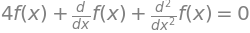

In [17]:
#微分方程式　f''(x) + f'(x)+4f(x) = 0
eq = sym.Eq(f(x).diff(x,2) + f(x).diff(x,1) + 4 * f(x))
eq

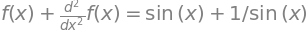

In [46]:
#微分方程式　f''(x)+f(x)=1/sinx+sinx
eq = sym.Eq(f(x).diff(x,2) + f(x), 1/sym.sin(x)+sym.sin(x))
eq

In [53]:
ans = sym.dsolve(eq)
ans

NotImplementedError: The given ODE -(-a + Derivative(f(x), (x, 2)))**(1/d)/(b + c*f(x)) + Derivative(f(x), x) cannot be solved by the factorable group method

In [48]:
plot(ans.rhs, (x, 10, -10))

ValueError: The same variable should be used in all univariate expressions being plotted.

In [42]:
#f(0) = 1, f'(0) = 1, f''(0) = 1
ans = sym.dsolve(eq, ics={f(0):1, f(x).diff(x,1).subs(x, 0):1})
print(ans)
ans

ValueError: Couldn't solve for initial conditions

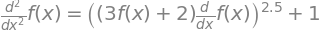

In [56]:
eq = sym.Eq(f(x).diff(x,2), 1+((2+3*f(x))*f(x).diff(x,1))**2.5)
eq

In [57]:
ans = sym.dsolve(eq)
ans

NotImplementedError: The given ODE 0.25*(3.23606797749979 + 2.35114100916989*I)*(Derivative(f(x), (x, 2)) - 1.0)**(2/5)*(1/(243.0*f(x)**5 + 810.0*f(x)**4 + 1080.0*f(x)**3 + 720.0*f(x)**2 + 240.0*f(x) + 32.0))**(1/5) + Derivative(f(x), x) cannot be solved by the factorable group method

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#2階常微分方程式（運動方程式、自由落下）
def func_motion(t, x):
    dydx = t[1]
    dtdx = 1+((3*y + 2)*dydx)**2.5
    return [dydx, dtdx]


#2d可視化
def plot2d(x_list, y_list, x_label, y_label):
    plt.xlabel(x_label)  #x軸の名前
    plt.ylabel(y_label)  #y軸の名前
    plt.grid()  #点線の目盛りを表示
    plt.plot(x_list, y_list)

    plt.show()


#メイン実行部
if (__name__ == '__main__'):
    #2階常微分方程式（運動方程式、自由落下）
    x_list = np.linspace(0.0, 10.0, 1000)
    t0 = 0.0  #初速度
    m_init = [100.0, 0.0]  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, x_list)
    print(m_list)

    plot2d(x_list, m_list[:, 0], "$x$", "$y(x)$")
    plot2d(x_list, m_list[:, 1], "$x$", "$t(x)$")

TypeError: Cannot convert expression to float

In [59]:
!pip install scipy